# Pan-Tompkins Algorithm application

This Notebook will be evaluating the Errors that remain after Pan-Tompkins Algorithm application to ECG Snippets. First PT will be applied to artefacts found to see if outliers persist, then outliers from previously taken snippets of data will be analysed to find their sources of error.

In [46]:
# 'Importing' the functions from the previous notebook
%run Pan_Tomkins_Algorithm_Final.ipynb

#Importing the test snippets
df = pd.read_csv('./database/new_ecg_data/artefacts.csv', encoding = 'latin-1')

## Part 1: Applying PT to artefacts

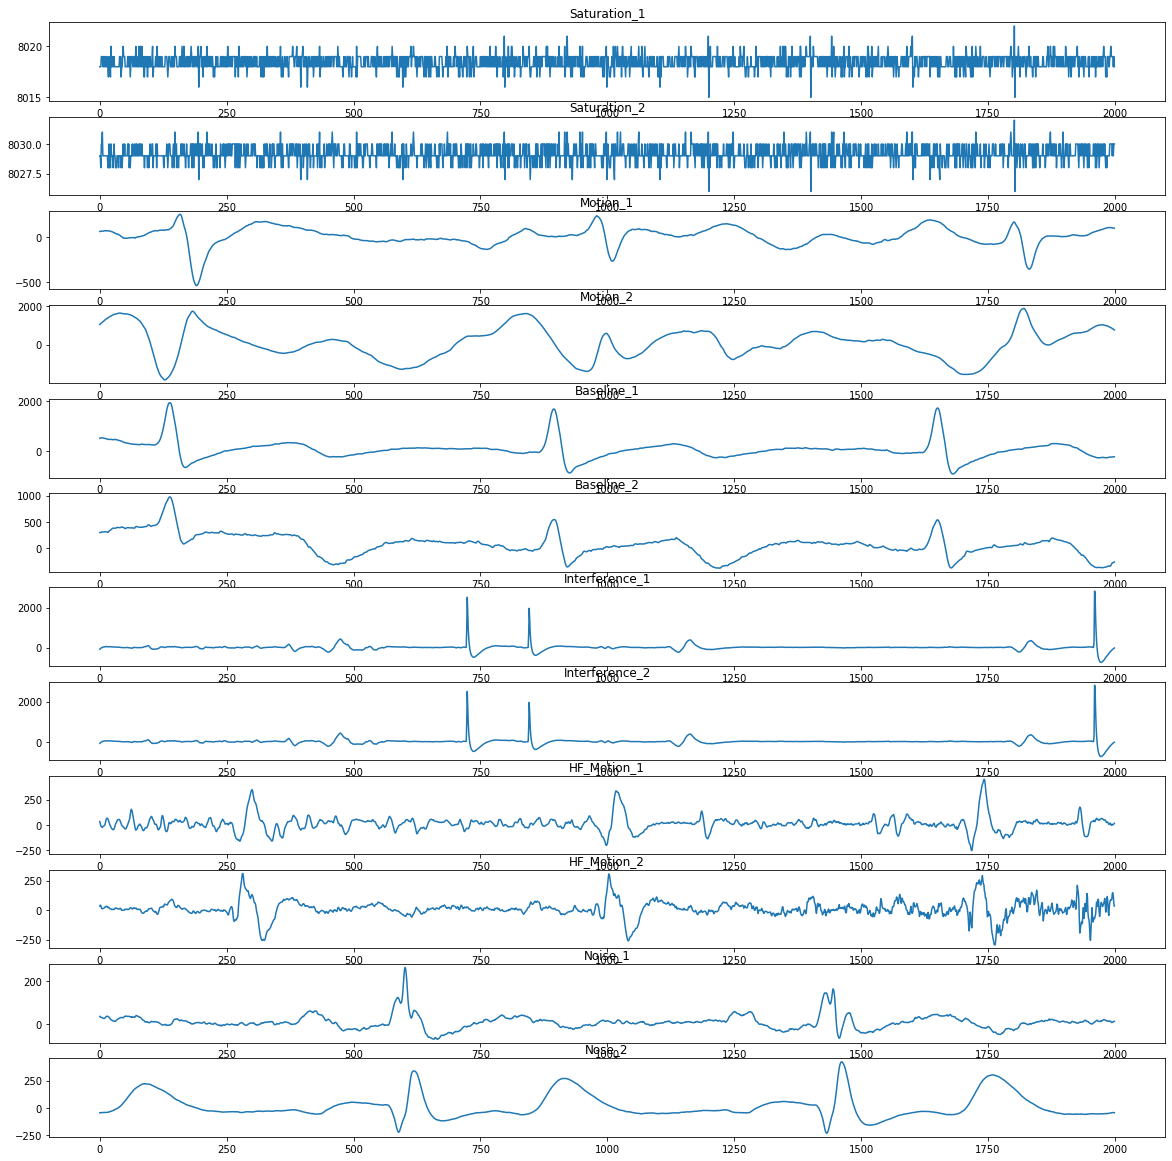

In [24]:
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    axs[i].plot(df.iloc[:,i])
    axs[i].set_title(df.columns[i])

### Filtering

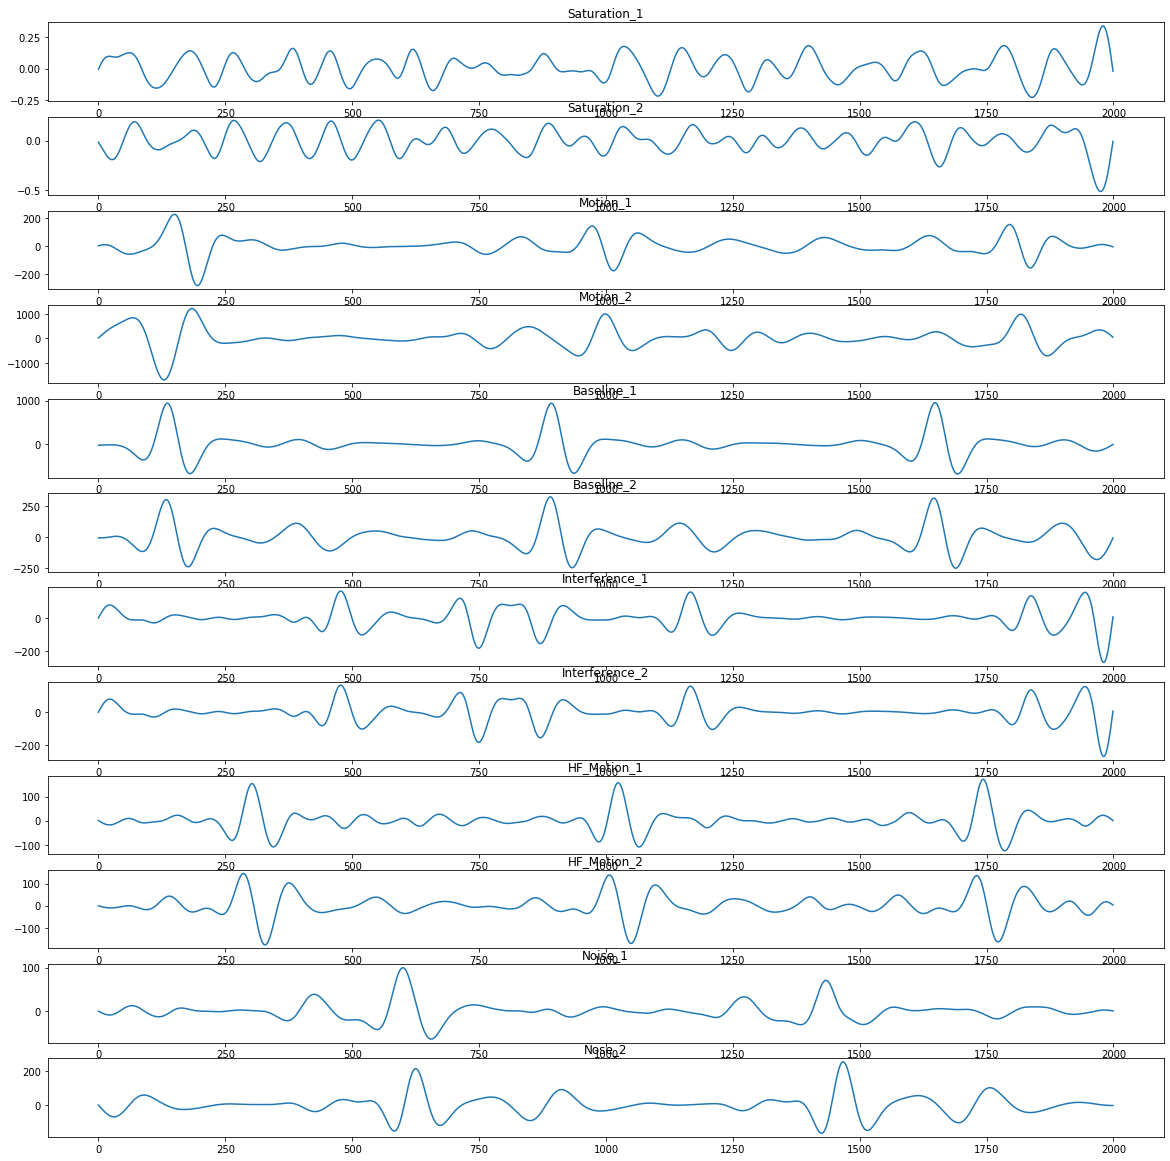

In [36]:
df_filter = df.copy()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _filtering(df.iloc[:,i], 1000)
    df_filter[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])


### Differentiation + Squaring

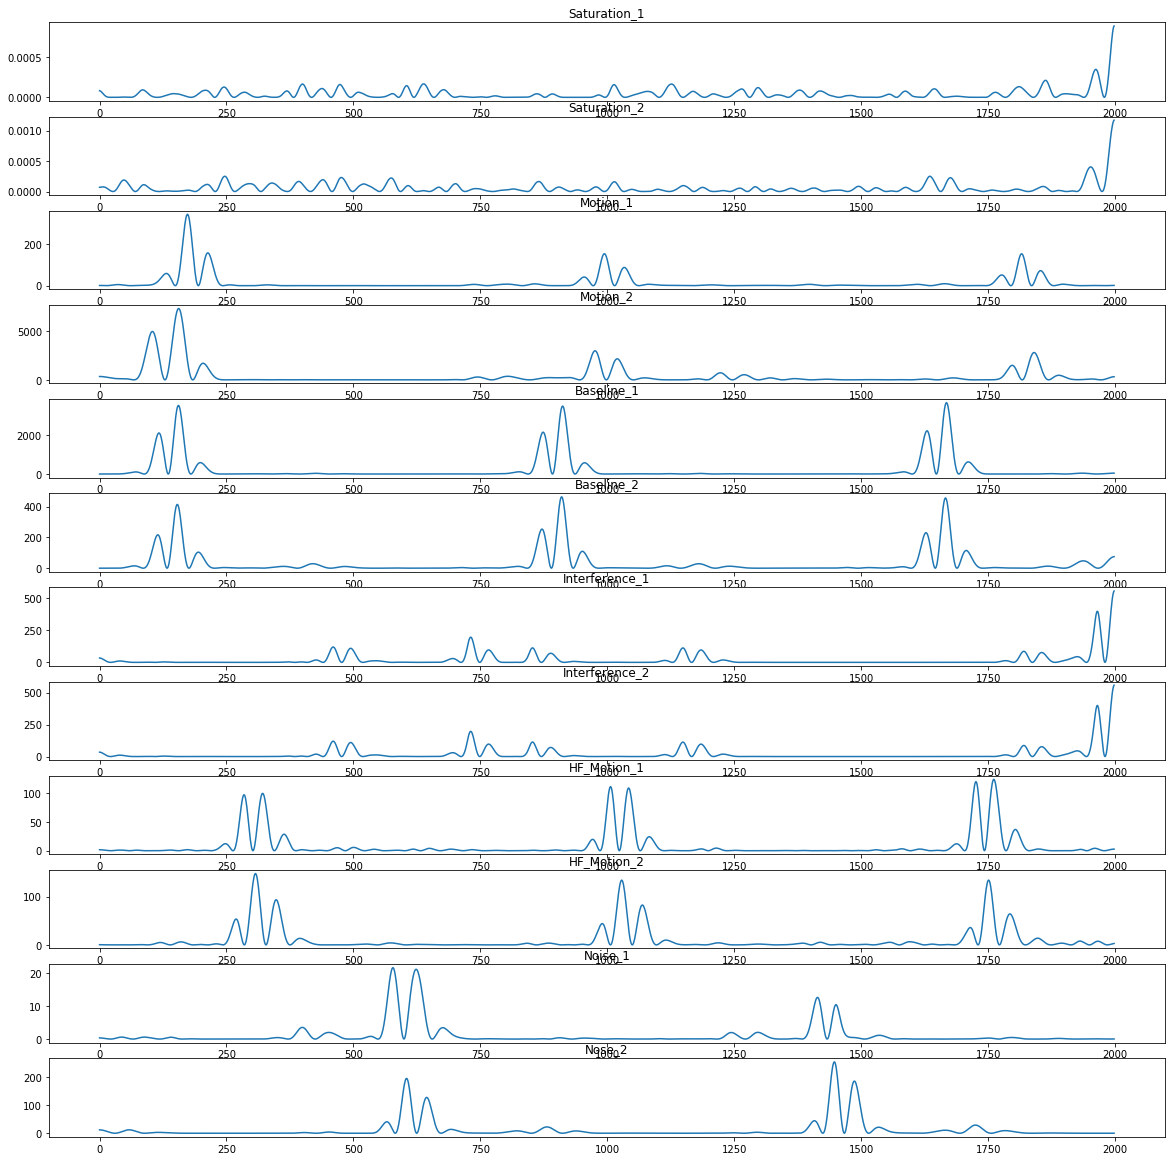

In [37]:
df_diff = pd.DataFrame()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _squaring(_differentiation(df_filter.iloc[:,i]))
    df_diff[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])
    
del df_filter

### Integration

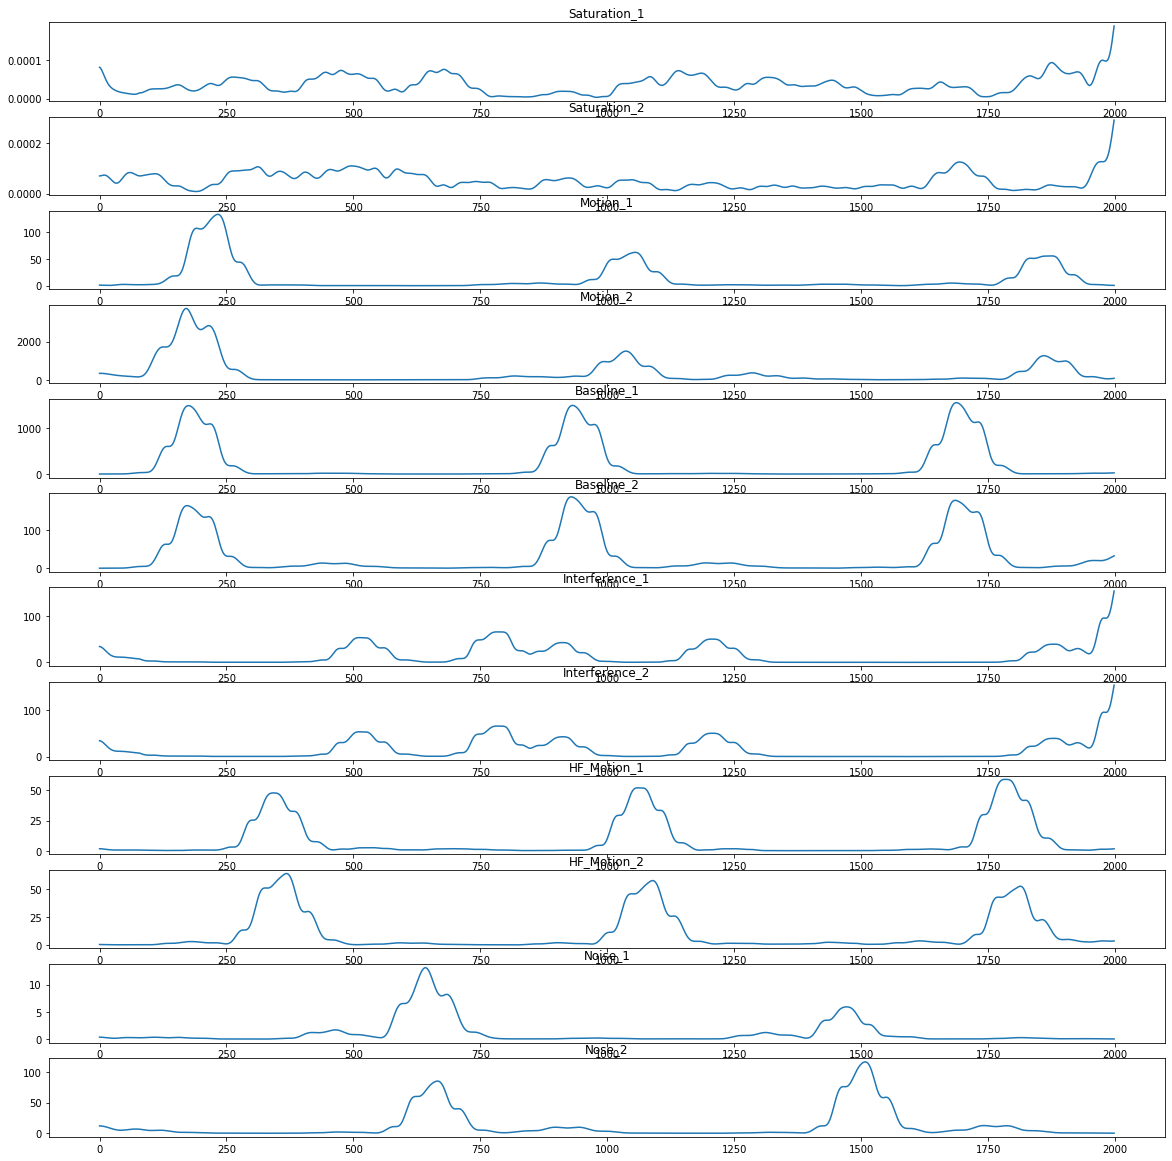

In [53]:
df_int = pd.DataFrame()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _integration((df_diff.iloc[:,i]).to_numpy(), 1000)
    df_int[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])
    
#del df_filter

### Peak detection + correction

[ 613 1199]
[]
[1010 1831]
[ 998 1821]
[ 895 1651]
[ 895 1651]
[ 474 1163]
[ 474 1163]
[ 300 1017 1743]
[ 320 1041 1763]
[ 601 1445]
[ 618 1461]


C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


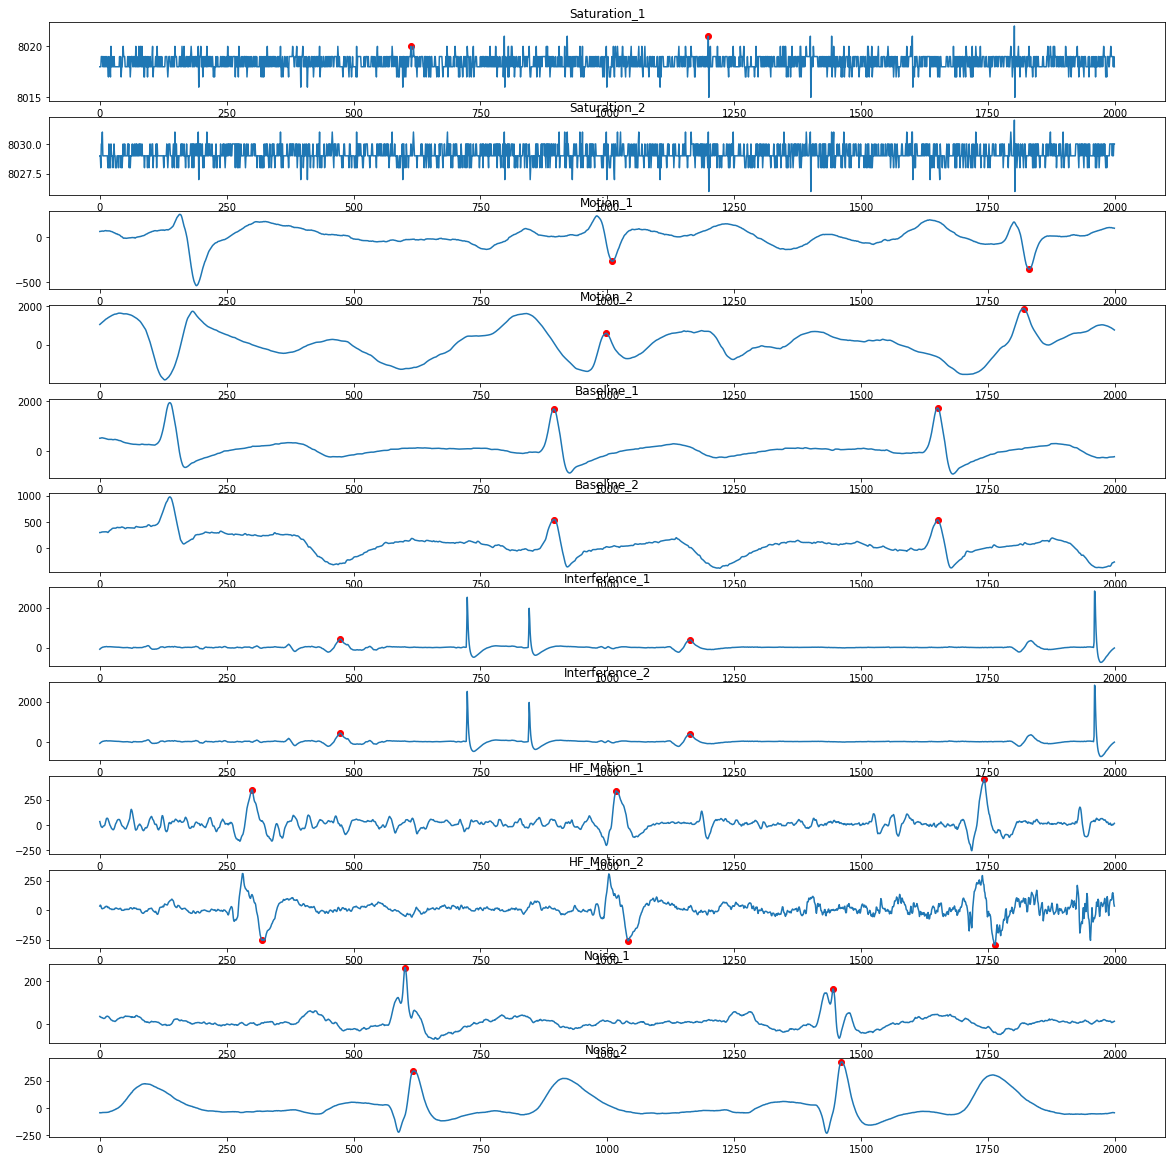

In [80]:
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)

for i in range(12):
    signal = df.iloc[:,i]
    new = _pantompkins((signal).to_numpy(), 1000)
    print(new)
    # Plotting the peaks against the original signal
    x_data = signal.index
    y_values = []
    for point in new:
        value = np.interp(point, x_data, signal)
        y_values.append(value)
    axs[i].scatter(new,y_values,marker='o',c='red')
    axs[i].plot(signal)
    axs[i].set_title(df.columns[i])

### Conclusions
- peaks are incorrectly detected in cases of saturation
- peaks are not detected in cases of motion artefacts, baseline wander, interference
- more accurate at detecting peaks in instances of general noise and HF motion

## Part 2: Applying PT algorithm to snippets